In [1]:
import pandas as pd
import numpy as np
import os
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 457.0 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'G:\Projects\harry_potter_project\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Read characters
character_df = pd.read_csv("characters.csv")
character_df

book               character
0      Category:Baptism of Fire characters                  Adalia
1      Category:Baptism of Fire characters                   Adela
2      Category:Baptism of Fire characters           Aen Saevherne
3      Category:Baptism of Fire characters                Aevenien
4      Category:Baptism of Fire characters                  Aglaïs
...                                    ...                     ...
1270  Category:Time of Contempt characters        Yanna of Murivel
1271  Category:Time of Contempt characters           Yarpen Zigrin
1272  Category:Time of Contempt characters  Yennefer of Vengerberg
1273  Category:Time of Contempt characters         Yiolenta Suarez
1274  Category:Time of Contempt characters                   Zyvik

[1275 rows x 2 columns]

In [4]:
# Load spacy english model
NER=spacy.load("en_core_web_sm")

### Load books

In [5]:
# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if '.txt' in b.name]

In [6]:
all_books

[<DirEntry '1 - The Last Wish.txt'>,
 <DirEntry '2 - The Sword of Destiny.txt'>,
 <DirEntry '3 - Blood of Elves.txt'>,
 <DirEntry '4 - Times of Contempt.txt'>,
 <DirEntry '5 - Baptism of Fire.txt'>,
 <DirEntry '6 - The Tower of the Swallow.txt'>,
 <DirEntry '7 - The Lady of the Lake.txt'>,
 <DirEntry '8 - something ends something begins.txt'>]

In [7]:
book = all_books[0]
book_text = open(book).read()
book_doc = NER(book_text)

In [8]:
#Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

In [9]:
# Remove brackets and text within brackets
import re
character_df['character']=character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
character_df['character_firstname']=character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [10]:
pd.set_option('display.max_rows',None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

### Get named entity list per sentence

In [11]:
sent_entity_df = []

#Loop through sentences, store named entity for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities":entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [12]:
sent_entity_df

sentence  \
0     (ï»¿'Does, she, always, devour, her, victims, ...   
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
3                                             (Pish, !)   
4     (Devours, ,, takes, a, bite, ,, leaves, aside,...   
5     (She, only, bit, the, head, from, one, ,, gutt...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
8     (', Has, anyone, she, 's, attacked, survived, ...   
9     (The, witcher, asked, ,, apparently, paying, n...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
11           (', Yes, ,, ', said, the, bearded, man, .)   
12    (', At, the, very, beginning, ,, seven, years,...   
13                             (One, escaped-, ', \n\n)   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
15        (You, \n, remember, ., ., ., ?, ', \n\n \n\n)   
16    (IV, \n\n \n\n, The, following, day, ,, late, ...   
17    (He, was, led, in, by, a, soldier, in, a, hood...   
18    (The, conversation, did, not, yield, any, sign...   
19    (The, miller, was, terrified, ;, he, mumbled, ...   
20    (The, striga, could, open, her, \n, jaws, impr...   
21    (Her, claws, were, sharper, than, a, wildcat, ...   
22    (And, \n, it, was, only, because, of, that, th...   
23    (Having, finished, his, examination, Geralt, n...   
24    (The, soldier, pushed, the, peasant, through, ...   
25                 (It, was, Foltest, himself, ., \n\n)   
26    (', Sit, ,, do, not, get, up, ,, ', said, the,...   
27                  (', This, visit, is, unofficial, .)   
28           (Are, you, happy, with, the, interview, ?)   
29    (I, \n, heard, you, were, at, the, palace, thi...   
30               (', Yes, ,, your, Majesty, ., ', \n\n)   
31    (', When, will, you, set, about, your, task, ?...   
32    (', It, is, four, days, until, the, full, moon...   
33                            (After, that, ., ', \n\n)   
34    (', You, prefer, to, have, a, look, at, her, y...   
35                          (', There, is, no, need, .)   
36    (But, having, had, her, fill, the-, the, princ...   
37        (', Striga, ,, master, witcher, ,, striga, .)   
38               (Let, us, not, play, at, diplomacy, .)   
39      (She, will, be, a, princess, afterwards, ., \n)   
40    (And, that, is, what, I, have, come, to, talk,...   
41    (Answer, me, unofficially, ,, briefly, and, cl...   
42      (Do, n't, hide, behind, your, code, ., ', \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
44    (', I, confirm, ,, your, Majesty, ,, that, the...   
45    (And, ,, unless, I, am, mistaken, ,, it, can, ...   
46    (The, third, crowing, of, the, cock, ,, as, lo...   
47    (That, is, what, is, usually, done, with, \n, ...   
48                          (', So, simple, ?, ', \n\n)   
49                          (', It, is, not, simple, .)   
50       (First, you, have, to, survive, the, night, .)   
51    (Then, there, are, exceptions, to, the, rule, ...   
52                                   (Consecutively, .)   
53       (There, are, also, cases, which, are, ., ., .)   
54                                  (well, ., ., ., \n)   
55                               (hopeless, ., ', \n\n)   
56                    (Yes, ,, ', Foltest, bristled, .)   
57    (', I, keep, hearing, that, from, some, people...   
58    (Kill, the, monster, because, it, 's, an, \n, ...   
59    (Master, witcher, ,, I, \n\n, am, sure, they, ...   
60                                    (Am, I, right, ?)   
61    (Hack, the, man, -, eater, to, death, without,...   
62     (I, wo, n't, pay, ,, but, \n\n\n, they, will, .)   
63                                (Very, convenient, .)   
64                                      (And, cheap, .)   
65    (Because, the, king, will, order, the, witcher...   
66    (', The, king, unconditionally, orders, the, w...   
67                          (Geralt

In [13]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
           if ent in list(character_df.character)
           or ent in list(character_df.character_firstname)]

In [14]:
filter_entity(["Geralt of Rivia","Thu","2","two"],character_df)

['Geralt of Rivia']

In [15]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x:filter_entity(x, character_df))

# remove sentences that does not have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
sent_entity_df_filtered

sentence  \
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
23    (Having, finished, his, examination, Geralt, n...   
25                 (It, was, Foltest, himself, ., \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
67                          (Geralt, grimaced, ., \n\n)   
68    (Foltest, looked, the, Rivian, in, the, eyes, ...   
72             (Geralt, was, silent, for, a, moment, .)   
77                                (Foltest, got, up, .)   
108                      (Geralt, was, silent, ., \n\n)   
114                    (Foltest, grew, gloomy, ., \n\n)   
115   (', I, do, not, think, it, will, come, to, tha...   
133                         (Foltest, grew, pensive, .)   
146                                   (', Geralt, ., ')   
147   (For, the, first, time, Foltest, called, the, ...   
148   (', Yes, ., ', \n\n, ', How, much, truth, is, ...   
154                                     (Geralt, ?, \n)   
166   (he, asked, ,, not, looking, at, Geralt, ., \n\n)   
170                 (Do, you, know, what, ,, Geralt, ?)   
173         (Foltest, turned, ,, his, eyes, glinted, .)   
183   (Foltest, turned, away, ,, started, towards, t...   
184   (For, a, moment, Geralt, thought, he, would, l...   
193                  (Geralt, did, not, reply, ., \n\n)   
197   (He, did, n't, confirm, it, ,, did, n't, nod, ...   
216   (Geralt, whispered, an, incantation, and, dran...   
224   (For, anyone, who, was, not, ,, like, \n, Gera...   
229   (Geralt, threw, his, sword, across, his, back,...   
231   (The, man, ,, Ostrit, ,, backed, away, abruptl...   
234   (But, the, mixture, enables, one, to, see, in,...   
235       (Ostrit, quickly, regained, control, ., \n\n)   
244   (Ostrit, hefted, a, sizeable, purse, in, his, ...   
249                     (Ostrit, raised, his, voice, .)   
255   (I, am, not, in, league, with, Velerad, and, S...   
265   (', Now, ,, that, ,, ', Ostrit, raised, his, h...   
267   (', It, will, be, easier, to, remove, Foltest,...   
276   (Ostrit, yelled, furiously, ,, placing, his, h...   
282   (Who, bends, double, to, Foltest, and, behind,...   
290   (', You, 'd, better, leave, ,, Lord, Ostrit, ,...   
292   (Ostrit, took, a, step, back, ,, drew, his, sw...   
297                                 (Geralt, smiled, .)   
299   (But, the, \n, witcher, was, not, going, to, l...   
303   (He, did, not, see, Geralt, standing, right, b...   
312                  (Ostrit, panted, heavily, ., \n\n)   
318   (But, not, now, ., ', \n\n, ', You, scoundrel,...   
320   (', Yes, ., ', \n\n, Ostrit, did, n't, say, an...   
323   (', It, 's, true, that, I, wanted, to, overthr...   
328                 (Geralt, remained, silent, ., \n\n)   
329                              (', I, loved, Adda, .)   
360   (', No, ., ', \n\n, Ostrit, did, not, hear, th...   
362         (Ostrit, did, not, wait, for, the, word, .)   
366   (Geralt, ,, \n, prudently, behind, the, stairc...   
369   (The, witcher, could, n't, make, out, exactly,...   
374   (He, knew, that, the, striga, ,, although, wel...   
386   (The, striga, stood, motionless, ,, her, gaze,...   
389   (Geralt, jumped, to, the, side, ,, spun, a, sw...   
391   (She, did, n't, lose, her, balance, and, attac...   
401   (Geralt, backed, away, and, ,, carefully, plac...   
407   (Geralt, was, content, \n, -, if, he, wanted, ...   
410   (Geralt, moved, to, a, safer, distance, and, ,...   
414   (Geralt, waited, calmly, and, ,, \n, with, his...   
419                           (Geralt, grew, uneasy, .)   
425   (To, gain, time, Geralt, jumped, on, to, the, ...   
431   (Geralt, ,, feeling, fury, \n, building, insid...   
435                                

In [16]:
sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

1                                   [Velerad]
2                                    [Geralt]
6                           [Velerad, Ostrit]
7                                      [Adda]
10                          [Segelin, Ostrit]
14                                  [Velerad]
23                                   [Geralt]
25                                  [Foltest]
43                                   [Geralt]
67                                   [Geralt]
68                                  [Foltest]
72                                   [Geralt]
77                                  [Foltest]
108                                  [Geralt]
114                                 [Foltest]
115                                  [Geralt]
133                                 [Foltest]
146                                  [Geralt]
147                                 [Foltest]
148                                    [Adda]
154                                  [Geralt]
166                               

### Create relationships

In [17]:
window_size = 5
relationships=[]

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i:end_i].character_entities),[])

    # Remove duplicated characters
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i]!=char_list[i-1]] 

    if len(char_unique)>1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target":b})

In [18]:
relationship_df=pd.DataFrame(relationships)

In [19]:
pd.set_option('display.max_rows',None)
relationship_df

source           target
0                  Velerad           Geralt
1                  Velerad           Geralt
2                   Geralt          Velerad
3                  Velerad           Ostrit
4                   Geralt          Velerad
5                  Velerad           Ostrit
6                   Ostrit             Adda
7                  Velerad           Ostrit
8                   Ostrit             Adda
9                  Velerad           Ostrit
10                  Ostrit             Adda
11                 Velerad           Ostrit
12                  Ostrit             Adda
13                    Adda          Segelin
14                 Segelin           Ostrit
15                 Velerad           Ostrit
16                  Ostrit             Adda
17                    Adda          Segelin
18                 Segelin           Ostrit
19                    Adda          Segelin
20                 Segelin           Ostrit
21                 Segelin           Ostrit
22                 Segelin           Ostrit
23                  Ostrit          Velerad
24                 Segelin           Ostrit
25                  Ostrit          Velerad
26                  Geralt          Foltest
27                  Geralt          Foltest
28                  Geralt          Foltest
29                  Geralt          Foltest
30                  Geralt          Foltest
31                  Geralt          Foltest
32                  Geralt          Foltest
33                  Geralt          Foltest
34                  Geralt          Foltest
35                 Foltest           Geralt
36                 Foltest           Geralt
37                  Geralt          Foltest
38                 Foltest           Geralt
39                 Foltest           Geralt
40                 Foltest           Geralt
41                 Foltest           Geralt
42                 Foltest           Geralt
43                  Geralt          Foltest
44                  Geralt          Foltest
45                 Foltest             Adda
46                  Geralt          Foltest
47                 Foltest             Adda
48                  Geralt          Foltest
49                 Foltest             Adda
50                  Geralt          Foltest
51                 Foltest             Adda
52                 Foltest             Adda
53                  Geralt          Foltest
54                  Geralt          Foltest
55                  Geralt          Foltest
56                 Foltest           Geralt
57                 Foltest           Geralt
58                 Foltest           Geralt
59                 Foltest           Geralt
60                 Foltest           Geralt
61                  Geralt          Foltest
62                  Geralt          Foltest
63                  Geralt           Ostrit
64                  Geralt           Ostrit
65                  Geralt           Ostrit
66                  Geralt           Ostrit
67                  Ostrit           Geralt
68                  Ostrit           Geralt
69                  Geralt           Ostrit
70                  Ostrit           Geralt
71                  Geralt           Ostrit
72                  Geralt           Ostrit
73                  Geralt           Ostrit
74                  Geralt           Ostrit
75                  Ostrit           Geralt
76                  Ostrit           Geralt
77                  Ostrit           Geralt
78                  Ostrit           Geralt
79                  Ostrit           Geralt
80                  Ostrit           Geralt
81                  Geralt           Ostrit
82                 Velerad          Segelin
83                 Velerad          Segelin
84                 Velerad          Segelin
85                 Velerad          Segelin
86                 Velerad          Segelin
87                 Velerad          Segelin
88                  Ostrit          Foltest
89                  Ostrit          Foltest
90              

In [20]:
#sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values,axis=1),columns=relationship_df.columns)
relationship_df

source                target
0              Geralt               Velerad
1              Geralt               Velerad
2              Geralt               Velerad
3              Ostrit               Velerad
4              Geralt               Velerad
5              Ostrit               Velerad
6                Adda                Ostrit
7              Ostrit               Velerad
8                Adda                Ostrit
9              Ostrit               Velerad
10               Adda                Ostrit
11             Ostrit               Velerad
12               Adda                Ostrit
13               Adda               Segelin
14             Ostrit               Segelin
15             Ostrit               Velerad
16               Adda                Ostrit
17               Adda               Segelin
18             Ostrit               Segelin
19               Adda               Segelin
20             Ostrit               Segelin
21             Ostrit               Segelin
22             Ostrit               Segelin
23             Ostrit               Velerad
24             Ostrit               Segelin
25             Ostrit               Velerad
26            Foltest                Geralt
27            Foltest                Geralt
28            Foltest                Geralt
29            Foltest                Geralt
30            Foltest                Geralt
31            Foltest                Geralt
32            Foltest                Geralt
33            Foltest                Geralt
34            Foltest                Geralt
35            Foltest                Geralt
36            Foltest                Geralt
37            Foltest                Geralt
38            Foltest                Geralt
39            Foltest                Geralt
40            Foltest                Geralt
41            Foltest                Geralt
42            Foltest                Geralt
43            Foltest                Geralt
44            Foltest                Geralt
45               Adda               Foltest
46            Foltest                Geralt
47               Adda               Foltest
48            Foltest                Geralt
49               Adda               Foltest
50            Foltest                Geralt
51               Adda               Foltest
52               Adda               Foltest
53            Foltest                Geralt
54            Foltest                Geralt
55            Foltest                Geralt
56            Foltest                Geralt
57            Foltest                Geralt
58            Foltest                Geralt
59            Foltest                Geralt
60            Foltest                Geralt
61            Foltest                Geralt
62            Foltest                Geralt
63             Geralt                Ostrit
64             Geralt                Ostrit
65             Geralt                Ostrit
66             Geralt                Ostrit
67             Geralt                Ostrit
68             Geralt                Ostrit
69             Geralt                Ostrit
70             Geralt                Ostrit
71             Geralt                Ostrit
72             Geralt                Ostrit
73             Geralt                Ostrit
74             Geralt                Ostrit
75             Geralt                Ostrit
76             Geralt                Ostrit
77             Geralt                Ostrit
78             Geralt                Ostrit
79             Geralt                Ostrit
80             Geralt                Ostrit
81             Geralt                Ostrit
82            Segelin               Velerad
83            Segelin               Velerad
84            Segelin               Velerad
85            Segelin               Velerad
86            Segelin               Velerad
87            Segelin               Velerad
88            Foltest                Ostrit
89            Foltest                Ostrit
90         

In [21]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"],sort=False,as_index=False).sum()


In [22]:
relationship_df

source                target  value
0             Geralt               Velerad     10
1             Ostrit               Velerad      8
2               Adda                Ostrit      5
3               Adda               Segelin      3
4             Ostrit               Segelin      6
5            Foltest                Geralt     38
6               Adda               Foltest      5
7             Geralt                Ostrit     34
8            Segelin               Velerad      6
9            Foltest                Ostrit      7
10           Foltest               Velerad      6
11              Adda                Geralt     10
12            Geralt               Nenneke     96
13           Nenneke              Yennefer     12
14            Geralt                 Roach     38
15            Geralt                   Two     24
16       Rulle Asper                   Two      4
17            Geralt           Rulle Asper      4
18            Geralt              Nivellen    116
19           Glutton              Nivellen      3
20             Fenne                Geralt      5
21             Fenne              Nivellen     14
22          Nivellen               Primula      2
23            Geralt               Primula     17
24              Ilka               Primula      6
25              Ilka              Venimira      6
26          Nivellen              Venimira      2
27          Nivellen                 Roach      5
28           Glutton                 Roach      2
29           Glutton               Vereena      4
30            Geralt               Vereena     15
31          Nivellen               Vereena     14
32           Falwick                Geralt     82
33            Geralt              Hereward     19
34          Hereward               Nenneke      8
35           Falwick               Nenneke     31
36           Falwick              Hereward     13
37          Ermellia              Hereward      4
38          Dragomir                Trigla      6
39         Caldemeyn                Geralt     58
40              Borg               Karelka      6
41              Borg             Caldemeyn      3
42            Geralt                 Irion     11
43         Caldemeyn                 Irion      1
44            Geralt             Stregobor     36
45            Geralt                Zavist      4
46          Eltibald                Geralt      1
47            Fialka               Silvena      4
48           Evermir                Fialka      6
49             Abrad               Evermir      1
50            Aridea             Fredefalk     25
51            Aridea                Geralt      3
52         Fredefalk                Geralt      6
53         Fredefalk             Stregobor      5
54         Fredefalk                Renfri      5
55            Aridea                Renfri      7
56          Eltibald             Stregobor      9
57               Two                   Vyr      4
58             Nimir                   Vyr      5
59            Geralt                Nohorn      3
60            Geralt                 Tavik     31
61            Nohorn                 Tavik     15
62           Fifteen                Nohorn     35
63            Nohorn                Renfri     19
64           Fifteen                 Tavik      7
65            Civril               Fifteen     14
66            Civril                 Tavik      9
67            Civril                Geralt     13
68            Civril                Nohorn     25
69           Fifteen                Geralt      4
70            Civril                Renfri      9
71            Geralt                Renfri    121
72            Renfri                 Tavik     10
73         Caldemeyn                Renfri     10
74            Audoen                Renfri     20
75            Geralt               Libushe      9
76            Renfri             Stregobor      9
77            Audoen             Stregobor      4
78            Aridea             Stregobor      6
79           M

In [23]:
(relationship_df == 'Cirilla').sum()

source    0
target    0
value     0
dtype: int64

### Graph analysis and visualization

In [24]:
#create a graph from pandas df
G = nx.from_pandas_edgelist(relationship_df,
                            source="source",
                            target="target",
                            edge_attr = "value",
                            create_using=nx.Graph())

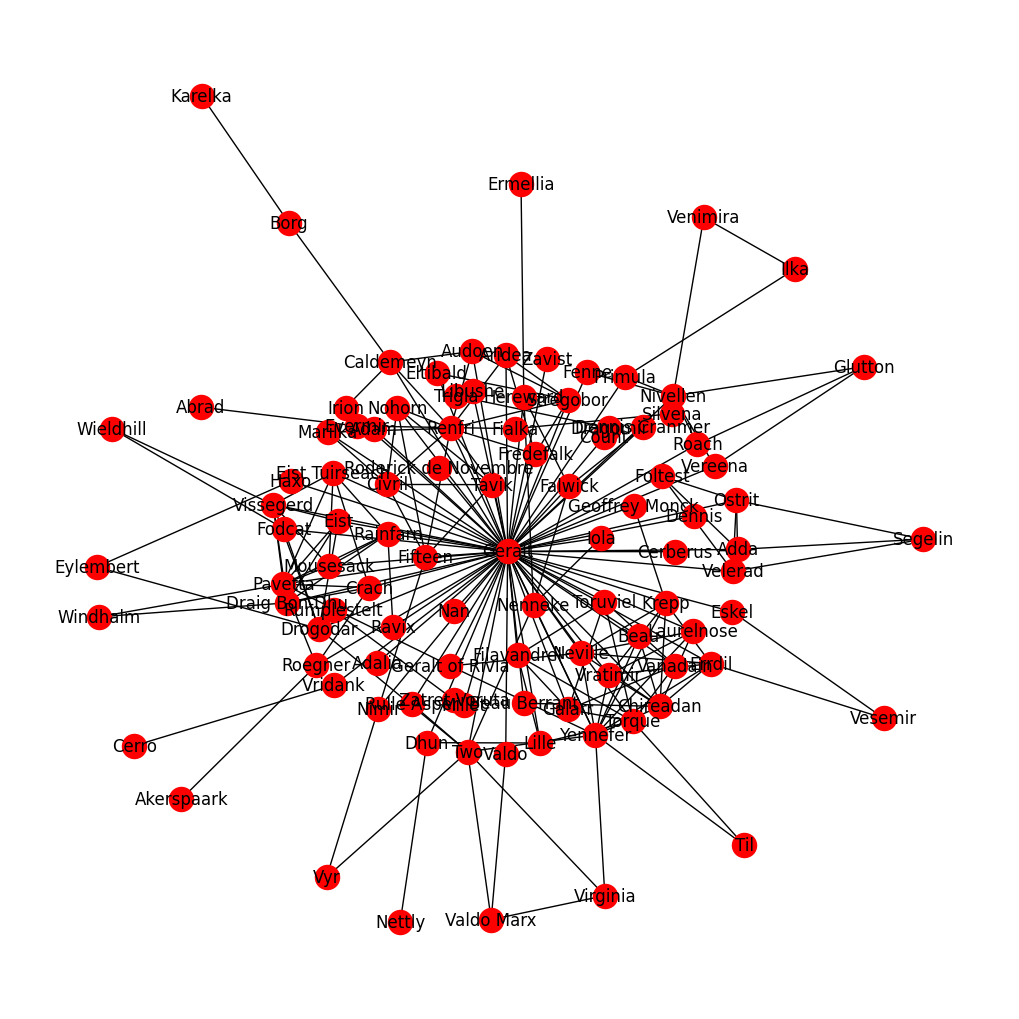

In [25]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G,with_labels=True,node_color='red',edge_cmap=plt.cm.Greens, pos=pos)
plt.show()

In [26]:
#!pip install scipy

In [27]:
from pyvis.network import Network
net=Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='skyblue')
node_degree=dict(G.degree)

nx.set_node_attributes(G,node_degree,'size')
net.from_nx(G)
net.show("witcher.html")

witcher.html


### Important characterss in the book

In [28]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.74,
 'Velerad': 0.04,
 'Ostrit': 0.05,
 'Adda': 0.04,
 'Segelin': 0.03,
 'Foltest': 0.04,
 'Nenneke': 0.06,
 'Yennefer': 0.13,
 'Roach': 0.03,
 'Two': 0.08,
 'Rulle Asper': 0.02,
 'Nivellen': 0.07,
 'Glutton': 0.03,
 'Fenne': 0.02,
 'Primula': 0.03,
 'Ilka': 0.02,
 'Venimira': 0.02,
 'Vereena': 0.03,
 'Falwick': 0.04,
 'Hereward': 0.04,
 'Ermellia': 0.01,
 'Dragomir': 0.01,
 'Trigla': 0.01,
 'Caldemeyn': 0.05,
 'Borg': 0.02,
 'Karelka': 0.01,
 'Irion': 0.02,
 'Stregobor': 0.06,
 'Zavist': 0.01,
 'Eltibald': 0.02,
 'Fialka': 0.02,
 'Silvena': 0.01,
 'Evermir': 0.02,
 'Abrad': 0.01,
 'Aridea': 0.04,
 'Fredefalk': 0.04,
 'Renfri': 0.11,
 'Vyr': 0.02,
 'Nimir': 0.03,
 'Nohorn': 0.05,
 'Tavik': 0.05,
 'Fifteen': 0.06,
 'Civril': 0.06,
 'Audoen': 0.04,
 'Libushe': 0.01,
 'Marilka': 0.03,
 'Adam': 0.01,
 'Haxo': 0.02,
 'Roegner': 0.04,
 'Drogodar': 0.06,
 'Eylembert': 0.02,
 'Eist Tuirseach': 0.06,
 'Pavetta': 0.1,
 'Crach': 0.05,
 'Draig Bon-Dhu': 0.06,
 'Eist': 0.05,
 'Fodcat':

<Axes: >

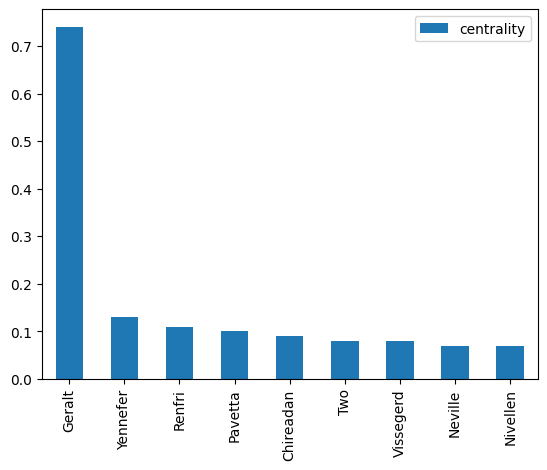

In [29]:
degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])
#plot top 10 nodes
degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind="bar")

### Community detection

In [30]:
import community as community_louvain

In [31]:
communities = community_louvain.best_partition(G)
communities

{'Geralt': 8,
 'Velerad': 0,
 'Ostrit': 0,
 'Adda': 0,
 'Segelin': 0,
 'Foltest': 0,
 'Nenneke': 8,
 'Yennefer': 10,
 'Roach': 4,
 'Two': 5,
 'Rulle Asper': 5,
 'Nivellen': 4,
 'Glutton': 4,
 'Fenne': 4,
 'Primula': 4,
 'Ilka': 4,
 'Venimira': 4,
 'Vereena': 4,
 'Falwick': 8,
 'Hereward': 8,
 'Ermellia': 8,
 'Dragomir': 9,
 'Trigla': 9,
 'Caldemeyn': 2,
 'Borg': 2,
 'Karelka': 2,
 'Irion': 2,
 'Stregobor': 2,
 'Zavist': 8,
 'Eltibald': 2,
 'Fialka': 1,
 'Silvena': 1,
 'Evermir': 1,
 'Abrad': 1,
 'Aridea': 2,
 'Fredefalk': 2,
 'Renfri': 2,
 'Vyr': 5,
 'Nimir': 5,
 'Nohorn': 2,
 'Tavik': 2,
 'Fifteen': 2,
 'Civril': 2,
 'Audoen': 2,
 'Libushe': 8,
 'Marilka': 2,
 'Adam': 8,
 'Haxo': 3,
 'Roegner': 3,
 'Drogodar': 3,
 'Eylembert': 3,
 'Eist Tuirseach': 3,
 'Pavetta': 3,
 'Crach': 3,
 'Draig Bon-Dhu': 3,
 'Eist': 3,
 'Fodcat': 3,
 'Wieldhill': 3,
 'Vissegerd': 3,
 'Vridank': 8,
 'Cerro': 8,
 'Mousesack': 3,
 'Geralt of Rivia': 10,
 'Windhalm': 3,
 'Rumplestelt': 6,
 'Zatret Voruta': 6,
 'R

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='skyblue')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


### Evolution of character's importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graph fro books
books_graph=[]
all_books = [b for b in os.scandir('books') if '.txt' in b.name]

#sort dir entries by name
all_books.sort(key = lambda x: x.name)

In [36]:
# Loop through books list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))
    
    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
    
    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    
    # Create a graph from pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df,
                                source="source",
                                target="target",
                                edge_attr = "value",
                                create_using=nx.Graph())
    
    books_graph.append(G)

C:\Users\laksh\AppData\Local\Temp\ipykernel_10524\1055104585.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
C:\Users\laksh\AppData\Local\Temp\ipykernel_10524\1055104585.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x]

<Axes: >

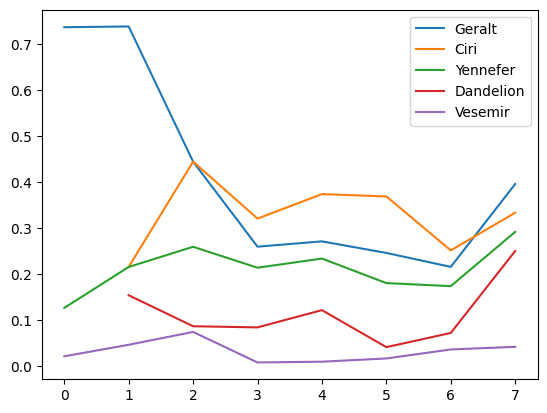

In [40]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir",]].plot()